# Extracting the PS data 

In [3]:
#Importing libraries Numpy and Matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
#Extracting the data from our files
T = np.loadtxt("2004_FGM_KSM_1M.TAB", usecols = (0), dtype='datetime64[m]')            #Universal time
B = np.loadtxt("2004_FGM_KSM_1M.TAB", usecols = (4))                                   #Total magnetic field
X_SN,Y_SN,Z_SN = np.loadtxt("2004_FGM_KSM_1M.TAB", usecols = (5,6,7), unpack = True)   #X,Y,Z in KSM coordinates

In [5]:
#Computing the shock stand off position
r = np.sqrt(X_SN**2+Y_SN**2+Z_SN**2)
costheta = X_SN/r
L = r*(1+1.05*costheta)
R_SN = L/2.05

In [ ]:
#First Method

#Making a loop which will select the data only during the passing (15-40RS)

#Creating empty arrays inwhich to stack our data
i = 0
a = 1 

R_SN_1 = np.empty(0)
B_1 = np.empty(0)
T_1 = np.empty(0,dtype='datetime64[m]')

#Time of a passing (in minutes)
BSC_time = 4*24*60                               

#The loop
while i < R_SN.size :
    if 15<R_SN[i]<40 :                                  #BS crossings occurs when R_SN is contained within 15-40 R_S
        R_SN_1 = np.append(R_SN_1,R_SN[i:i+BSC_time])   #New R_SN with only the data during the BS crossings
        B_1 = np.append(B_1,B[i:i+BSC_time])            #Total magnetic during the BS crosings
        T_1 = np.append(T_1,T[i:i+BSC_time])            #Timing of the BS crossings
        print("The {} passing occured on the {} at a stand off distance of {:.2f} saturn radii".format(a,T[i],R_SN[i]))
        i = i + BSC_time
        a = a + 1
    else :
        i = i + 1

In [ ]:
#Loop ploting each passings
i = 0
while i < T_1.size/BSC_time :
    #Ploting our passings
    fig = plt.figure()
    plt.plot(T_1[i*BSC_time:(i+1)*BSC_time],B_1[i*BSC_time:(i+1)*BSC_time])
    
    #Labelling the graph
    plt.xlabel('Time (in UT)')
    fig.autofmt_xdate()
    plt.ylabel('Total magnetic field (in nT)') 
    plt.title("Passing number {}".format(i+1)) 
    
    #Continuing the loop 
    i = i + 1

In [14]:
#Comparing with the data from Masters et al. (2008)

#Extracting the data from our files
Year, Month, Day, Hour, Minute = np.loadtxt("Data masters et al.txt", usecols = (1,2,3,5,6), unpack = True, dtype='str', skiprows = 1)
X_Masters, Y_Masters, Z_Masters = np.loadtxt("Data masters et al.txt", usecols = (7,8,9), unpack = True, skiprows = 1)

In [15]:
#Computing the shock stand off position for masters data
r_Masters = np.sqrt(X_Masters**2+Y_Masters**2+Z_Masters**2)
costheta_Masters = X_Masters/r_Masters
L_Masters = r_Masters*(1+1.05*costheta_Masters)
R_Masters = L_Masters/2.05
P_Masters = (12.3 / R_Masters) ** 4.3

In [16]:
#Converting the the name of the month to a month number
import datetime

Month_number = np.empty(0,dtype='str')
i = 0

while i < Month.size :
    m1 = datetime.datetime.strptime(Month[i], "%b").month          #Month name to Month number
    Month_number = np.append(Month_number,m1)                      #Creating a new array containing the month numbers
    i = i + 1

In [17]:
#The numpy datetime64 data type isn't able to identifies days/months with no 0 in fronts, 
#i.e we need to have 06 instead of 6 for the month of June for example

#Computing how many numbers there are in each data, i.e 6 returns 1 and 12 returns 2
length_checker = np.vectorize(len)
Month_number_length = length_checker(Month_number)     #For the Month
Day_number_length = length_checker(Day)                #For the Day

#Creating empty arrays for our new month/day arrays with zero in front when required
Month_number_with_zero = np.empty(0,dtype='str')
Day_number_with_zero = np.empty(0,dtype='str')

#Loop to add a zero in front of the number for the month 
i = 0
while i < Month_number.size : 
    if Month_number_length[i] == 1 :                                                #If just one number 
        m2 = np.char.add("0",Month_number[i])                                       #then add a zero in front
        Month_number_with_zero = np.append(Month_number_with_zero,m2)               #add the new number to the new array
        i = i + 1
    else :
        Month_number_with_zero = np.append(Month_number_with_zero,Month_number[i])  #otherwise do nothing
        i = i + 1

#Loop to add a zero in front of the number for the day 
i = 0
while i < Day.size : 
    if Day_number_length[i] == 1 :
        d1 = np.char.add("0",Day[i])
        Day_number_with_zero = np.append(Day_number_with_zero,d1)
        i = i + 1
    else :
        Day_number_with_zero = np.append(Day_number_with_zero,Day[i])
        i = i + 1

In [18]:
#Combining our separate time arrays (year,month,day,...) into a single one
time = np.char.add(Year,"-")
time = np.char.add(time, Month_number_with_zero)
time = np.char.add(time,"-")
time = np.char.add(time, Day_number_with_zero)
time = np.char.add(time,"T")
time = np.char.add(time, Hour)
time = np.char.add(time,":")
time = np.char.add(time, Minute)

#Creating a loop to make our two time arras in the same data type (datetime64)
time_Masters = np.empty(0,dtype='datetime64[m]')
i = 0

while i < time.size :
    time_Masters = np.append(time_Masters,np.datetime64(time[i]))
    i = i + 1


In [ ]:
#Second Method

#Making a loop which will select the data only during the passing (15-40RS)

#Creating empty arrays inwhich to stack our data
i = 0

R_SN_2 = np.empty(0)
B_2 = np.empty(0)
T_2 = np.empty(0,dtype='datetime64[m]')

#The loop
while i < R_SN.size :
    if 15<R_SN[i]<40 :                                  #BS crossings occurs when R_SN is contained within 15-40 R_S
        R_SN_2 = np.append(R_SN_2,R_SN[i])              #New R_SN with only the data during the BS crossings
        B_2 = np.append(B_2,B[i])                       #Total magnetic during the BS crosings
        T_2 = np.append(T_2,T[i])                       #Timing of the BS crossings
        i = i + 1
    else :
        i = i + 1
        
plt.plot(T_2,B_2)

In [19]:
#Compensating for the gap between 2004-07-03T23:04:30 and 2004-07-12T22:35:30
time_Masters_2 = np.empty(0,dtype='datetime64[m]')
time_Masters_2 = np.append(time_Masters_2,time_Masters[0:7])
time_Masters_2 = np.append(time_Masters_2,time_Masters[15:])

/var/folders/3t/hl9pmq_54qqdnwv8bgpwyg5m0000gn/T/ipykernel_9014/3502670081.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


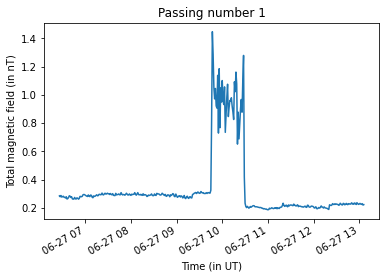

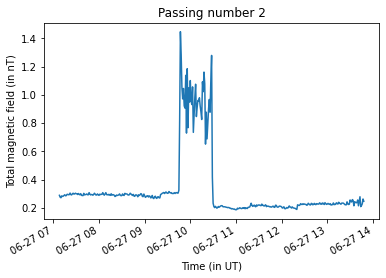

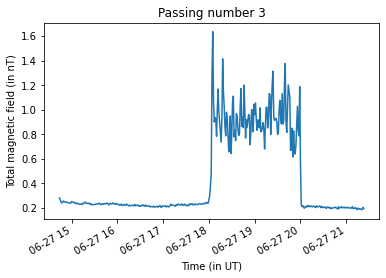

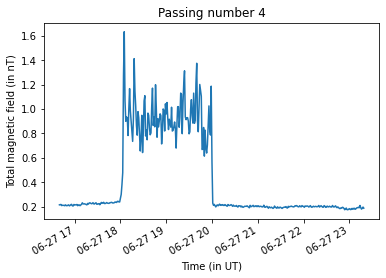

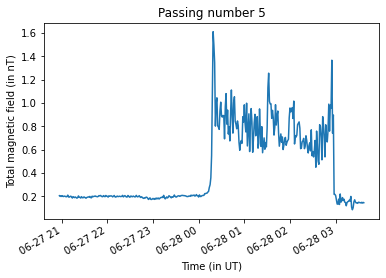

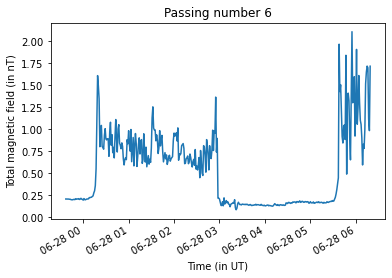

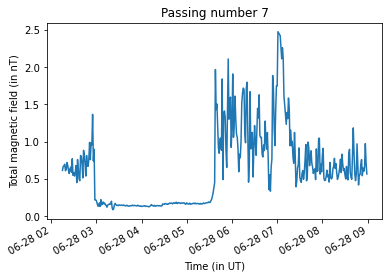

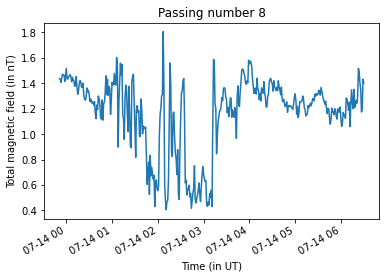

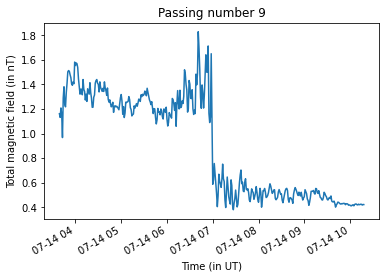

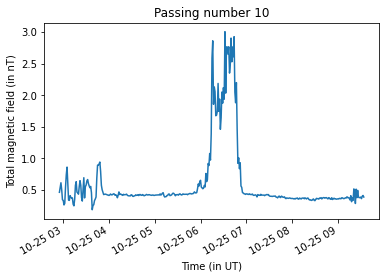

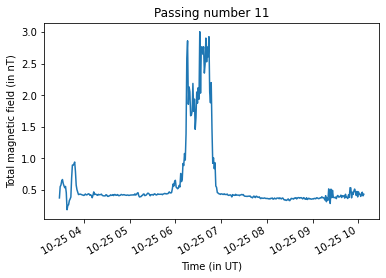

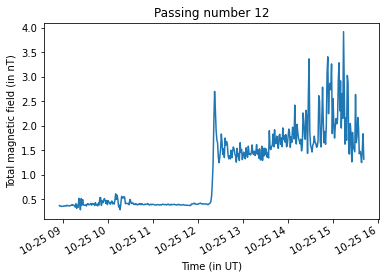

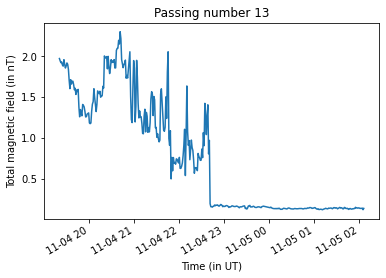

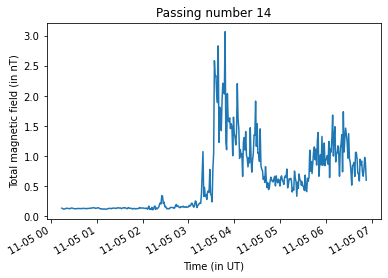

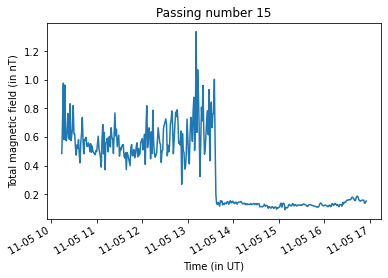

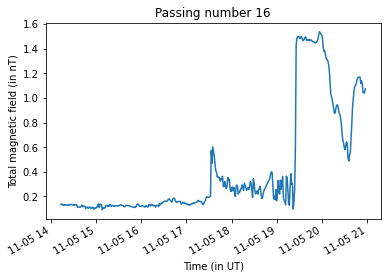

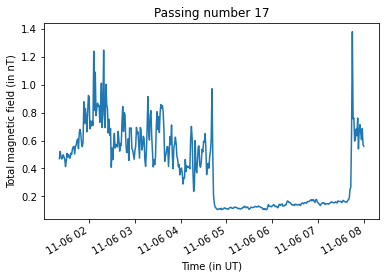

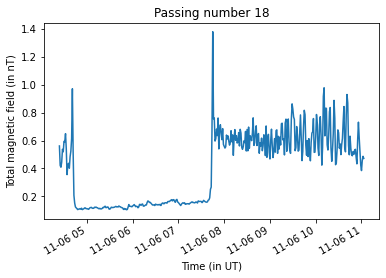

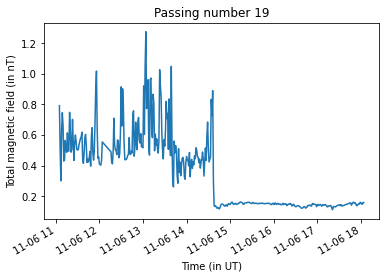

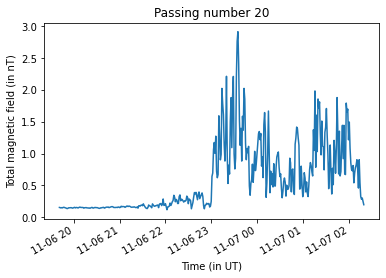

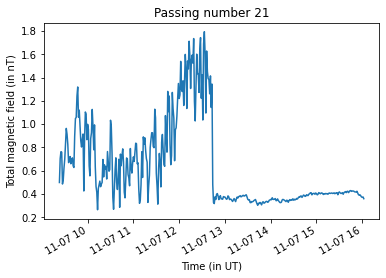

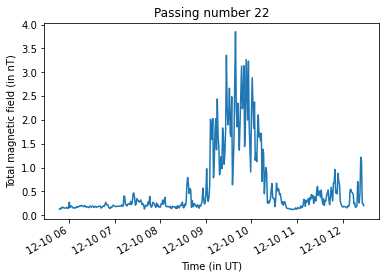

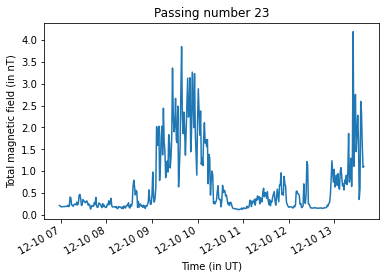

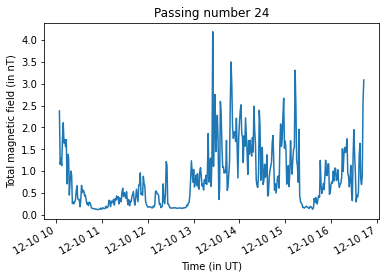

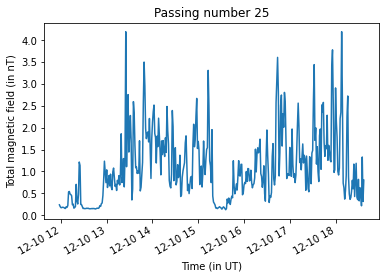

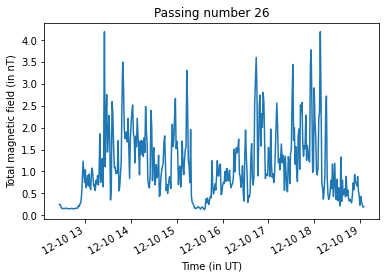

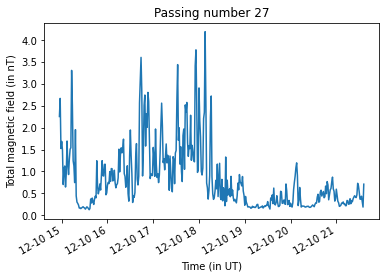

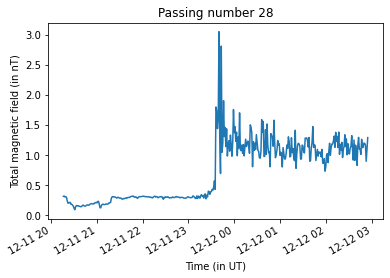

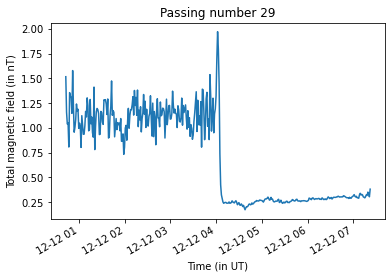

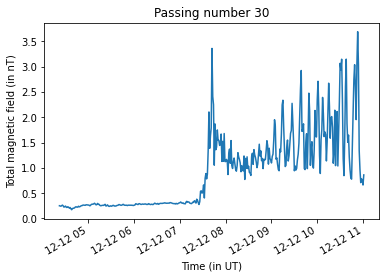

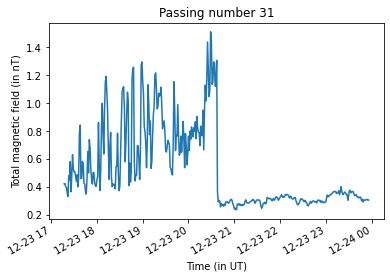

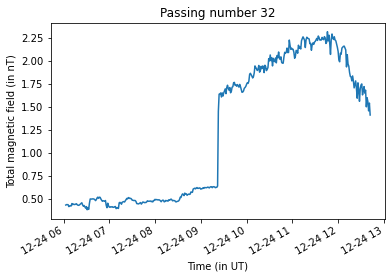

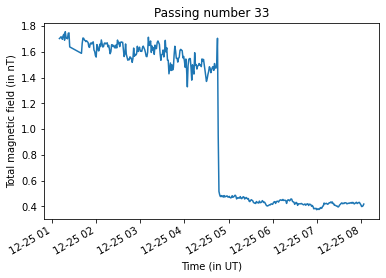

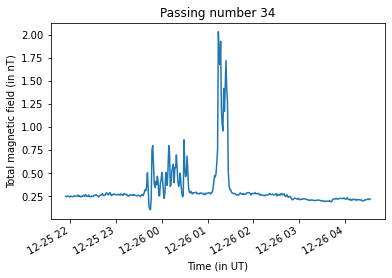

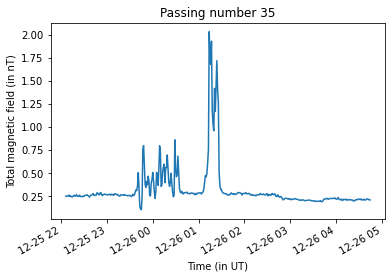

In [20]:
#Using Masters data to plot BS crossings
i = 0
a = 0
B_Masters_i = []

while i < T.size :
    if T[i] == time_Masters_2[a] :
        #Ploting our passings
        fig = plt.figure()
        plt.plot(T[i-200:i+200],B[i-200:i+200])
    
        #Labelling the graph
        plt.xlabel('Time (in UT)')
        fig.autofmt_xdate()
        plt.ylabel('Total magnetic field (in nT)') 
        plt.title("Passing number {}".format(a+1)) 
        
        B_Masters_i.append(B[i-200:i+200])
        #Continuing the loop 
        i = i + 1
        a = a + 1
    else :
        i = i + 1


# Kernel Smoothing

In [ ]:
np.savetxt('Masters_histoplots.txt',() , delimiter=',')

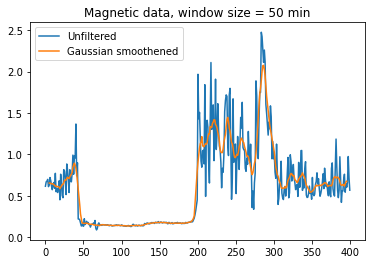

In [21]:
##### Smoothing function 
# talk about 6
import pandas as pd
i = 6 # crossing number
data = B_Masters_i[i] # first crossing data
x = np.linspace(0,len(data), len(data)) # for plotting 
plt.title("Magnetic data, window size = 50 min")
plt.plot(x, data, label = "Unfiltered") # plot clean data

window_size =10 # 10 minute FWHM kernel
std = window_size / np.sqrt(8 * np.log(2)) 
d = {'mag': data} # for pandas dataframe
crossing = pd.DataFrame(d) 
#smoothed_crossing = crossing.rolling(window=window_size, center=True).mean() # just average in 10 min window
smoothed_crossing = crossing.rolling(window=window_size, win_type="gaussian", center=True).mean(std=std) # gaussian 
smoothed_data = smoothed_crossing["mag"] # for plotting
plt.plot(x, smoothed_crossing["mag"], label = "Gaussian smoothened") # plot smoothened data
plt.legend(loc = "best")

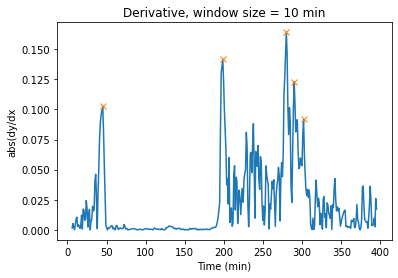

In [22]:
# Derivative function
from scipy.signal import find_peaks


dx = 1 
dy = np.gradient(smoothed_data, dx) # calculate derivative
dy = np.abs(np.gradient(smoothed_data, dx)) # absolute value of derivative
#dy[dy < 0] = 0 # delete going down gradient
x = np.linspace(0,len(dy), len(dy)) # for plotting
peaks, _ = find_peaks(dy, height=0.09, distance = window_size) # detect peaks of height 0.09 and that are 10 min appart
#plotting:
plt.title(f"Derivative, window size = {window_size} min")
plt.ylabel("abs(dy/dx")
plt.xlabel("Time (min)")
plt.plot(x, dy)
plt.plot(x[peaks], dy[peaks], "x")

In [55]:
# histogram of solar wind dynamic pressure
data = P_masters

mu, sigma = stats.norm.fit(data)
x = np.linspace(0,max(data)+0.05,100)
gaussian = stats.norm.pdf(x,mu,sigma) # see next text cell for explanation
nbins = 16
#print(f"nbins={nbins}")


plt.figure()
plt.plot(x, gaussian, 'r-')
#plt.xscale("log")
counts, bins, bars = plt.hist(data, bins= nbins ,density=True ,edgecolor='k')
plt.xlabel("R_SN")
plt.ylabel("P(r_SN < R_SN)")
plt.plot(bins[0:16], counts, ".")
print(mu, sigma)

x = bins[0:16] 
y = counts

NameError: name 'P_masters' is not defined

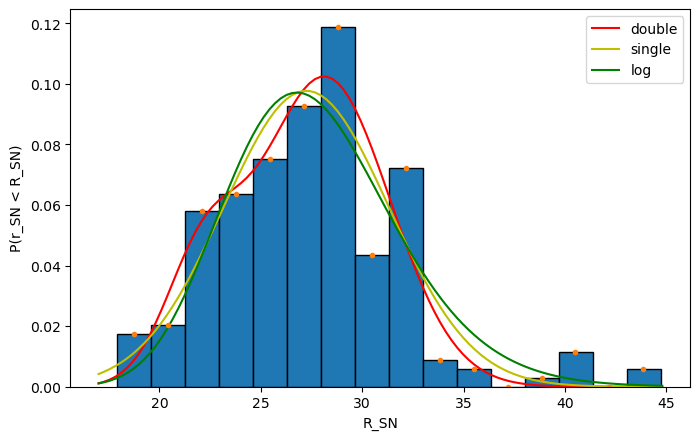

In [53]:
from scipy.optimize import curve_fit

width = bins[1]- bins[0] # bin width
x = bins[0:len(bins)-1]+width/2 # x value centered on bin middle
y = counts # y value bin

def double_gaussian( x, c, mu1, sigma1, mu2, sigma2 ):
    res =   c/(sigma1*np.sqrt(2*np.pi)) * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) ) \
          + ((1-c)/(sigma2*np.sqrt(2*np.pi))) * np.exp( - (x - mu2)**2.0 / (2.0 * sigma2**2.0) )
    return res

def single_gaussian( x, mu1, sigma1):
    res =   1/(sigma1*np.sqrt(2*np.pi)) * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) )
    return res

def log_gaussian( x, mu1, sigma1):
    res =   1/(x * sigma1*np.sqrt(2*np.pi)) * np.exp( - (np.log(x) - mu1)**2.0 / (2.0 * sigma1**2.0) )
    return res

param_bounds=([0,0,0,0,0],[1,np.inf,np.inf,np.inf,np.inf])

p0 =  [0.5, 27, 10, 37, 2 ] # initial guesses
popt, pcov = curve_fit(double_gaussian, x, y, p0=p0, bounds = param_bounds) # double fit

param_bounds=([0,0],[np.inf,np.inf])
p1 = [27, 10]
popt1, pcov1 = curve_fit(single_gaussian, x, y, p0=p1,bounds = param_bounds) # single fit
p2 = [27, 10]
popt2, pcov2 = curve_fit(log_gaussian, x, y, p0=p2, bounds = param_bounds) # log fit

x_fit = np.linspace(17,max(data)+0.05,100)

# plotting
plt.figure(figsize =(8,5), dpi = 100)
plt.plot(x_fit, double_gaussian(x_fit,*popt), 'r-', label = "double")
plt.plot(x_fit, single_gaussian(x_fit,*popt1), 'y-', label = "single")
plt.plot(x_fit, log_gaussian(x_fit,*popt2), 'g-', label = "log")
counts, bins, bars = plt.hist(data, bins= nbins ,density=True ,edgecolor='k')
plt.xlabel("R_SN")
plt.ylabel("P(r_SN < R_SN)")
plt.plot(bins[0:16]+0.8, counts, ".")
plt.legend(loc = "best")
plt.show()

In [56]:
print("double")
print(popt)
print(np.sqrt(np.diag(pcov)))
print("single")
print(popt1)
print(np.sqrt(np.diag(pcov1)))
print("log")
print(popt2)
print(np.sqrt(np.diag(pcov2)))

double
[ 0.82316206 28.15597828  3.21127668 22.12760312  1.87491086]
[0.22180458 1.05876342 0.85824116 1.52925907 1.33617476]
single
[27.24385116  4.08163324]
[0.43135536 0.35482695]
log
[3.3107867  0.15156226]
[0.01724612 0.01412996]


In [ ]:

dx = bins[1]- bins[0]
dy = np.gradient(y, dx) # calculate derivative
derivative = dy/dx

plt.figure(figsize=(4, 3), dpi=100)
plt.plot(x, derivative, ".")
plt.xlabel(r"R$_{SN}$")
plt.ylabel("Prob. Density")
plt.axhline(y=0, linestyle="-.", color ="k", linewidth = 0.5)
plt.show()


In [ ]:
from scipy.optimize import curve_fit

### NORMALIZE THE FUNCTION! AND MAKE SURE ITS A DENSITY!
def double_gaussian(x, c1, mu1, sigma1, mu2, sigma2):  
    res =   c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) ) \
          + (1-c1) * np.exp( - (x - mu2)**2.0 / (2.0 * sigma2**2.0) 
    return res

popt, pcov = curve_fit(double_gaussian, x, derivative, p0 = [0.5, 27, 10, 0.5, 37, 2 ])

x_fit = np.linspace(17,max(data)+0.05,100)

# plotting
plt.figure(dpi=150)
plt.plot(x_fit, double_gaussian(x_fit, *popt), color = "r")
plt.plot(x, derivative, ".")
plt.xlabel("R_SN")
plt.ylabel(r"Prob. Density")
plt.show()

# print values
error = np.sqrt(np.diag(pcov))
print(*popt)
print(*error)
print(popt/error)

# Statistical analysis

In [ ]:
# Plot of p Wind through time
plt.figure()
plt.title("Psw through time")
plt.xlabel("Time (UT)")
plt.ylabel("Psw")
plt.plot(time_Masters, P_Masters, ".-")
plt.show()

In [ ]:
from datetime import datetime
from astropy.timeseries import LombScargle

td = (time_Masters - time_Masters[0])/ np.timedelta64(1, 'D')

frequency, power = LombScargle(td, P_Masters).autopower()
best_frequency = frequency[np.argmax(power)]
best_period = 1 / best_frequency
print(best_period)

In [ ]:
plt.figure()
plt.title("Periodogram wind")
plt.plot(frequency, power, "-")
plt.xlabel("frequency [1/days]")
plt.ylabel("Power")
plt.axvline(best_frequency, color = "r", alpha = 0.4, label= f"best frequency = {best_frequency} ")
plt.legend(loc = "best")
plt.show()

In [ ]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(P_Masters)
peaks = np.delete(peaks,[6,10,13])

In [ ]:
plt.figure()
plt.title("Psw through time")
plt.xlabel("Time (UT)")
plt.ylabel("Psw")
plt.plot(td, P_Masters, ".-")
plt.plot(td[peaks], P_Masters[peaks], "x")
plt.axvline(crossings[15], color = "r", alpha = 0.4)
plt.show()

In [ ]:
index = td[peaks]/best_period
index = (np.rint(index)).astype(int) #round to nearest integer

calculated = []
for i in range(len(index)):
    crossing_i = td[0] + index[i] * best_period
    calculated.append(crossing_i)
diff = td[peaks] - calculated
print(calculated)
print(td[peaks])
print(diff)

In [ ]:
plt.figure()
#plt.plot(td, P_Masters, ".-")
#plt.plot(calculated, P_Masters[peaks],"X", label="calculated peaks")
plt.plot(td[peaks], diff, ".-")
plt.xlabel("Psw")
plt.ylabel("O-C maximum")
plt.legend(loc="best")
plt.show()

In [ ]:
frequency, power = LombScargle(td[peaks], diff).autopower()
best_frequency = frequency[np.argmax(power)]
best_period = 1 / best_frequency
print(best_period)

In [ ]:
plt.figure()
plt.plot(frequency, power)